In [342]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import os

In [343]:
import tensorflow

In [344]:
import keras

In [345]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from model_architectures import *

In [346]:
import tracks
from tracks import *
reload(tracks)

<module 'tracks' from 'tracks.py'>

In [347]:
import tracks
from tracks import *
reload(tracks)

<module 'tracks' from 'tracks.pyc'>

In [348]:
def adam_small_doublet_model(n_channels,n_labels=2):
    hit_shapes = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, n_channels), name='hit_shape_input')
    infos = Input(shape=(len(tracks.featureLabs),), name='info_input')

    drop = Dropout(0.5)(hit_shapes)
    conv = Conv2D(32, (4, 4), activation='relu', padding='same', data_format="channels_last", name='conv1')(hit_shapes)
    conv = Conv2D(32, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv2')(conv)
    b_norm = BatchNormalization()(conv)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='pool1')(b_norm)

    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv3')(pool)
    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv4')(conv)
    b_norm = BatchNormalization()(conv)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='pool2')(b_norm)

    conv = Conv2D(64, (3, 3), activation='relu', padding='same', data_format="channels_last", name='conv5')(pool)
    pool = MaxPooling2D(pool_size=(2, 2), padding='same', data_format="channels_last", name='avgpool')(conv)

    flat = Flatten()(pool)
    concat = concatenate([flat, infos])

    b_norm = BatchNormalization()(concat)
    dense = Dense(64, activation='relu', kernel_constraint=max_norm(10.0), name='dense1')(b_norm)
    drop = Dropout(0.5)(dense)
    dense = Dense(32, activation='relu', kernel_constraint=max_norm(10.0), name='dense2')(drop)
    drop = Dropout(0.5)(dense)
    pred = Dense(n_labels, activation='softmax', kernel_constraint=max_norm(10.0), name='output')(drop)

    model = Model(inputs=[hit_shapes, infos], outputs=pred)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [349]:
from matplotlib import pyplot as plt

In [350]:
padshape = 16

In [351]:
path = "./samples/"
d = "2_30_Apr18_cnn_tracks_1_aa.txt"
dfTracks = 0
dfDoublets = 0
#with open(path + d, 'rb') as df:
#    dfTracks = pd.read_table(df, sep="\t", header = None)

In [372]:
path = "./samples/"
d = "2_30_Apr18_cnn_tracks_1_aa.txt"
FILES = ["./samples/2_30_Apr18_cnn_tracks_1_aa.txt"]
FILES = ["./samples/" + el for el in os.listdir("./samples/")]
VAL_FILES = ["./samples/2_30_Apr18_cnn_tracks_1_ab.txt"]
train_tracks = Tracks(FILES)
val_tracks = Tracks(VAL_FILES)

Loading file 1/25 : ./samples/2_30_Apr18_cnn_tracks_1_aa.txt
Loading file 2/25 : ./samples/2_30_Apr18_cnn_tracks_1_ab.txt
Loading file 3/25 : ./samples/2_30_Apr18_cnn_tracks_1_ac.txt
Loading file 4/25 : ./samples/2_30_Apr18_cnn_tracks_1_ad.txt
Loading file 5/25 : ./samples/2_30_Apr18_cnn_tracks_1_ae.txt
Loading file 6/25 : ./samples/2_30_Apr18_cnn_tracks_1_af.txt
Loading file 7/25 : ./samples/2_30_Apr18_cnn_tracks_1_ag.txt
Loading file 8/25 : ./samples/2_30_Apr18_cnn_tracks_1_ah.txt
Loading file 9/25 : ./samples/2_30_Apr18_cnn_tracks_1_ai.txt
Loading file 10/25 : ./samples/2_30_Apr18_cnn_tracks_1_aj.txt
Loading file 11/25 : ./samples/2_30_Apr18_cnn_tracks_1_ak.txt
Loading file 12/25 : ./samples/2_30_Apr18_cnn_tracks_1_al.txt
Loading file 13/25 : ./samples/2_30_Apr18_cnn_tracks_1_am.txt
Loading file 14/25 : ./samples/2_30_Apr18_cnn_tracks_1_an.txt
Loading file 15/25 : ./samples/2_30_Apr18_cnn_tracks_1_ao.txt
Loading file 16/25 : ./samples/2_30_Apr18_cnn_tracks_1_ap.txt
Loading file 17/2

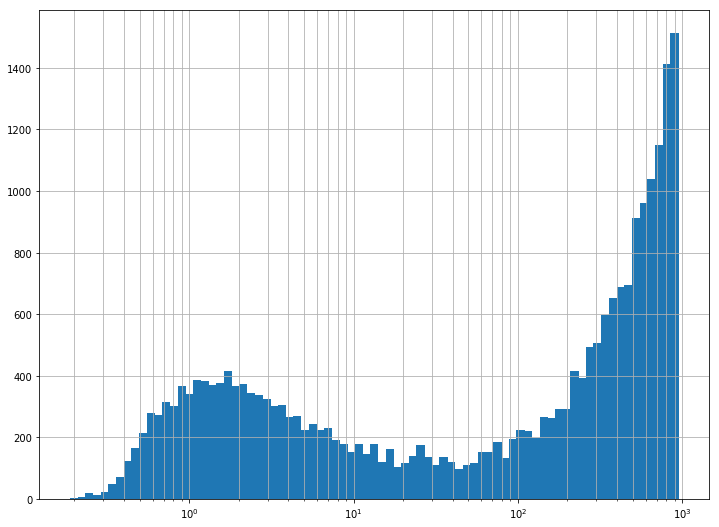

[   4    5   21   13   23   50   73  123  166  215  280  272  315  302  367
  341  385  382  369  378  417  368  374  344  339  324  302  305  267  270
  223  244  223  231  190  178  152  177  147  178  120  162  104  117  140
  175  137  112  137  120   96  110  118  153  154  186  133  195  224  220
  199  265  262  291  292  415  394  495  505  598  653  689  696  912  961
 1038 1151 1414 1513]
[  1.99526231e-01   2.22246762e-01   2.47554535e-01   2.75744164e-01
   3.07143813e-01   3.42119017e-01   3.81076930e-01   4.24471075e-01
   4.72806615e-01   5.26646239e-01   5.86616711e-01   6.53416164e-01
   7.27822230e-01   8.10701095e-01   9.03017574e-01   1.00584635e+00
   1.12038449e+00   1.24796536e+00   1.39007417e+00   1.54836526e+00
   1.72468132e+00   1.92107493e+00   2.13983234e+00   2.38350018e+00
   2.65491507e+00   2.95723662e+00   3.29398426e+00   3.66907815e+00
   4.08688488e+00   4.55226828e+00   5.07064599e+00   5.64805262e+00
   6.29120993e+00   7.00760510e+00   7.8055779

In [373]:
plt.figure(figsize=(12,9))
bins = np.logspace(-0.7, 3, 80)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(train_tracks.data["Pt"], bins=bins,normed=False)
hist_norm = hist[0]#/widths
plt.bar(bins[:-1], hist_norm, widths)

plt.xscale('log')
#plt.yscale('log')

#plt.ylim(1e-2,5e3)
plt.grid()
plt.grid(which='minor')
plt.show()
print(hist_norm)
print(bins)

In [374]:
train_tracks.clean_dataset()
train_tracks.data_by_pt()
train_tracks.data_by_pdg()

val_tracks.clean_dataset()
val_tracks.data_by_pdg()

Number of tracks in pt range [0.501187233627,0.551787873536] : 57
Number of tracks in pt range [0.551787873536,0.607497232478] : 47
Number of tracks in pt range [0.607497232478,0.668831094644] : 64
Number of tracks in pt range [0.668831094644,0.736357318596] : 81
Number of tracks in pt range [0.736357318596,0.81070109478] : 68
Number of tracks in pt range [0.81070109478,0.892550733834] : 78
Number of tracks in pt range [0.892550733834,0.982664039307] : 69
Number of tracks in pt range [0.982664039307,1.08187532377] : 77
Number of tracks in pt range [1.08187532377,1.19110313328] : 62
Number of tracks in pt range [1.19110313328,1.31135875174] : 74
Number of tracks in pt range [1.31135875174,1.44375556382] : 71
Number of tracks in pt range [1.44375556382,1.58951936326] : 88
Number of tracks in pt range [1.58951936326,1.7499997018] : 69
Number of tracks in pt range [1.7499997018,1.92668238406] : 91
Number of tracks in pt range [1.92668238406,2.12120322377] : 97
Number of tracks in pt range 

Number of tracks in pt range [347.141334854,382.189262063] : 220
Number of tracks in pt range [382.189262063,420.775682326] : 220
Number of tracks in pt range [420.775682326,463.257847384] : 220
Number of tracks in pt range [463.257847384,510.02907767] : 220
Number of tracks in pt range [510.02907767,561.522403858] : 220
Number of tracks in pt range [561.522403858,618.214576068] : 220
Number of tracks in pt range [618.214576068,680.630477854] : 220
Number of tracks in pt range [680.630477854,749.347985823] : 220
Number of tracks in pt range [749.347985823,825.003319905] : 220
Number of tracks in pt range [825.003319905,908.296933775] : 220
Number of tracks in pt range [908.296933775,1000.0] : 220
17854
Number of 211.0 : 5633
Number of 321.0 : 3703
 - New no. of 211.0 : 3703
 - New no. of 321.0 : 3703
Number of 211.0 : 417
Number of 321.0 : 312
 - New no. of 211.0 : 312
 - New no. of 321.0 : 312


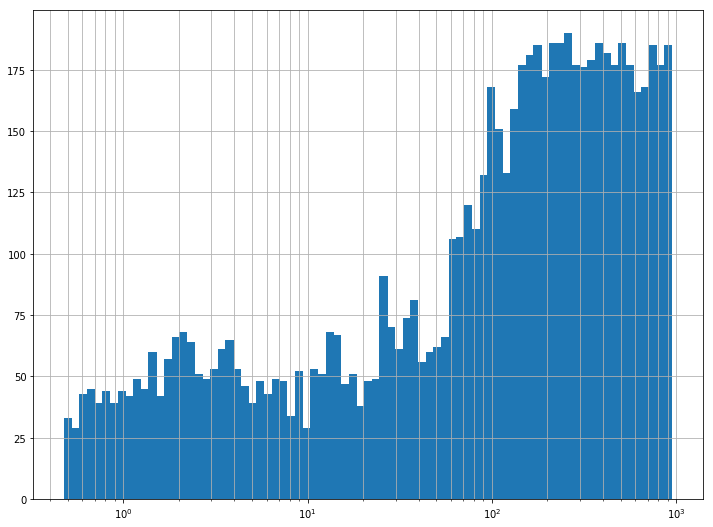

[ 33  29  43  45  39  44  39  44  42  49  45  60  42  57  66  68  64  51
  49  53  61  65  53  46  39  48  43  49  48  34  52  29  53  51  68  67
  47  51  38  48  49  91  70  61  74  81  56  60  62  66 106 107 120 110
 132 168 151 133 159 177 181 185 172 186 186 190 177 176 179 186 182 177
 186 177 166 168 185 177 185]
[  5.01187234e-01   5.51787874e-01   6.07497232e-01   6.68831095e-01
   7.36357319e-01   8.10701095e-01   8.92550734e-01   9.82664039e-01
   1.08187532e+00   1.19110313e+00   1.31135875e+00   1.44375556e+00
   1.58951936e+00   1.74999970e+00   1.92668238e+00   2.12120322e+00
   2.33536319e+00   2.57114508e+00   2.83073187e+00   3.11652694e+00
   3.43117634e+00   3.77759322e+00   4.15898488e+00   4.57888244e+00
   5.04117351e+00   5.55013820e+00   6.11048876e+00   6.72741317e+00
   7.40662323e+00   8.15440740e+00   8.97768900e+00   9.88409040e+00
   1.08820035e+01   1.19806674e+01   1.31902542e+01   1.45219627e+01
   1.59881225e+01   1.76023082e+01   1.93794645e+01   2.1

In [375]:
plt.figure(figsize=(12,9))
bins = np.logspace(-0.3, 3, 80)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(train_tracks.data["Pt"], bins=bins,normed=False)
hist_norm = hist[0]
plt.bar(bins[:-1], hist_norm, widths)

plt.xscale('log')
#plt.yscale('log')

#plt.ylim(1e-2,5e3)
plt.grid()
plt.grid(which='minor')
plt.show()
print(hist_norm)
print(bins)
print(np.sum(hist[0]))

In [341]:
print(np.logspace(-0.3, 3, 80))

[  5.01187234e-01   5.51787874e-01   6.07497232e-01   6.68831095e-01
   7.36357319e-01   8.10701095e-01   8.92550734e-01   9.82664039e-01
   1.08187532e+00   1.19110313e+00   1.31135875e+00   1.44375556e+00
   1.58951936e+00   1.74999970e+00   1.92668238e+00   2.12120322e+00
   2.33536319e+00   2.57114508e+00   2.83073187e+00   3.11652694e+00
   3.43117634e+00   3.77759322e+00   4.15898488e+00   4.57888244e+00
   5.04117351e+00   5.55013820e+00   6.11048876e+00   6.72741317e+00
   7.40662323e+00   8.15440740e+00   8.97768900e+00   9.88409040e+00
   1.08820035e+01   1.19806674e+01   1.31902542e+01   1.45219627e+01
   1.59881225e+01   1.76023082e+01   1.93794645e+01   2.13360453e+01
   2.34901655e+01   2.58617690e+01   2.84728133e+01   3.13474726e+01
   3.45123620e+01   3.79967836e+01   4.18329978e+01   4.60565221e+01
   5.07064599e+01   5.58258627e+01   6.14621283e+01   6.76674400e+01
   7.44992497e+01   8.20208094e+01   9.03017574e+01   9.94187628e+01
   1.09456235e+02   1.20507106e+02

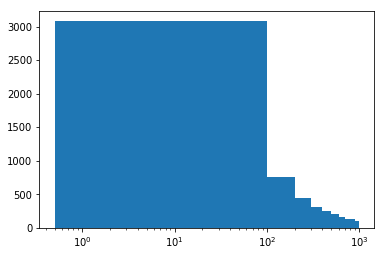

In [309]:
X_track, X_info, y = train_tracks.get_track_hits_data()
X_val_track, X_val_info, y_val = val_tracks.get_track_hits_data()

set([0.0, 1.0])
set([0.0, 1.0])


In [310]:
print(y)

[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


In [159]:
part={}

In [160]:
part[tuple(y[0])] = "Pion"
part[tuple(y[1])] = "Kaon"

In [161]:
train_input_list = [X_track, X_info]
val_input_list = [X_val_track, X_val_info]

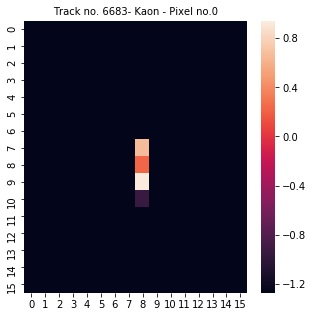

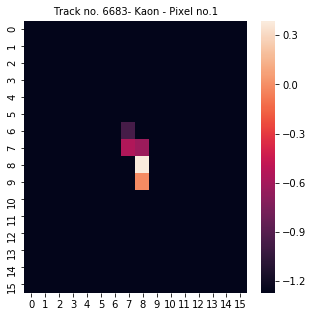

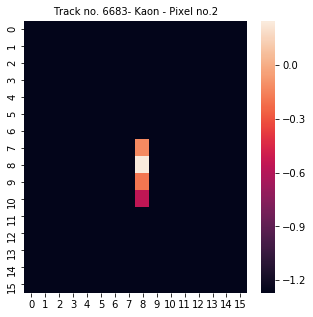

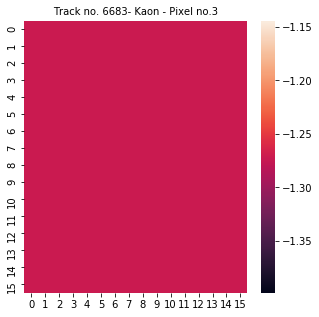

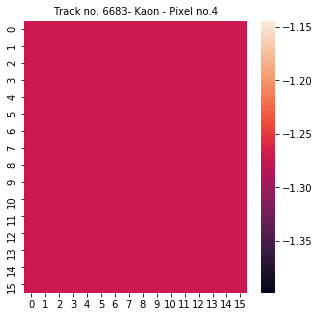

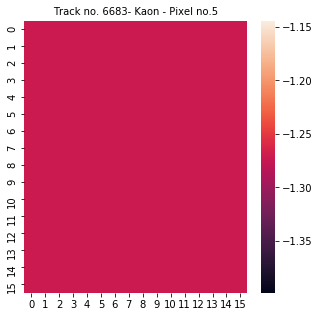

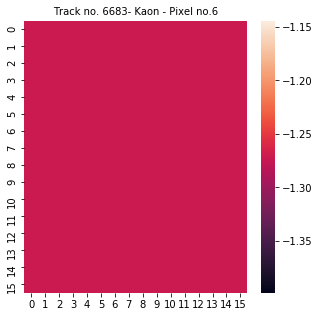

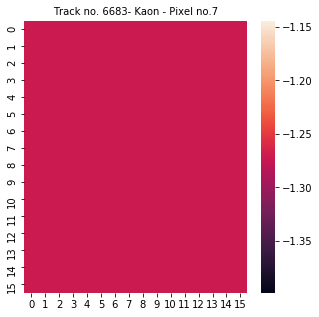

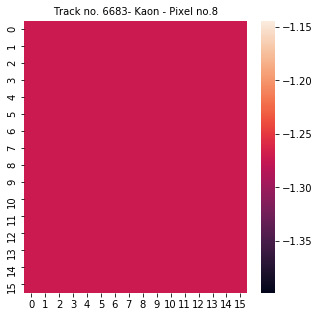

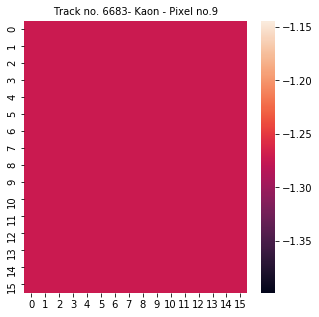

In [162]:
u = int(random.uniform(0,X_track.shape[0]))
for i in range(10):
    plt.figure(figsize=(5,5))
    plt.title("Track no. " + str(u) + "- " + str(part[tuple(y[u])]) + " - Pixel no." + str(i),fontsize=10)
        #print(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitDets[i]].values[u])
    sns.heatmap(X_track[u,:,:,i])
    #plt.imshow(X_track[5,:,:,i])
    #plt.colorbar()
    #plt.title("Track no. " + str(u) + "- " + str(y[u]) + " - Pixel no." + str(i),fontsize=25)
    plt.show()
    


In [163]:
model = adam_small_doublet_model(train_input_list[0].shape[-1],n_labels=2)

In [164]:
callbacks = [
        EarlyStopping(monitor='val_loss', patience=10),
        ModelCheckpoint("test_last.h5", save_best_only=True,
                        save_weights_only=True),
        TensorBoard(log_dir="", histogram_freq=0,
                    write_graph=True, write_images=True)
		#roc_callback(training_data=(train_input_list,y),validation_data=(val_input_list,y_val))
    ]

In [165]:
history = model.fit(train_input_list, y, batch_size=1024, epochs=100, shuffle=True,validation_data=(val_input_list,y_val), callbacks=callbacks, verbose=True)

Train on 17568 samples, validate on 729 samples
Epoch 1/100
17568/17568 [==============================] - 23s - loss: 0.8940 - acc: 0.5255 - val_loss: 0.7304 - val_acc: 0.5171
Epoch 2/100
 4096/17568 [=====>........................] - ETA: 17s - loss: 0.7639 - acc: 0.5334

KeyboardInterrupt: 

In [ ]:
print(len(dataLab))
#print(dataLab)
print(len(hitLabs)-256)

In [ ]:
dfTracks.columns = dataLab

In [ ]:
dfTracks[hitCoords[0]].head()

In [ ]:
dfTracks.head()

In [ ]:
dfTracks[hitPixels[0]].head()

In [174]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"].values,log=True,range=[0.0,100], bins=200,normed=True)
#plt.ylim(10,1e2)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

TypeError: 'int' object has no attribute '__getitem__'

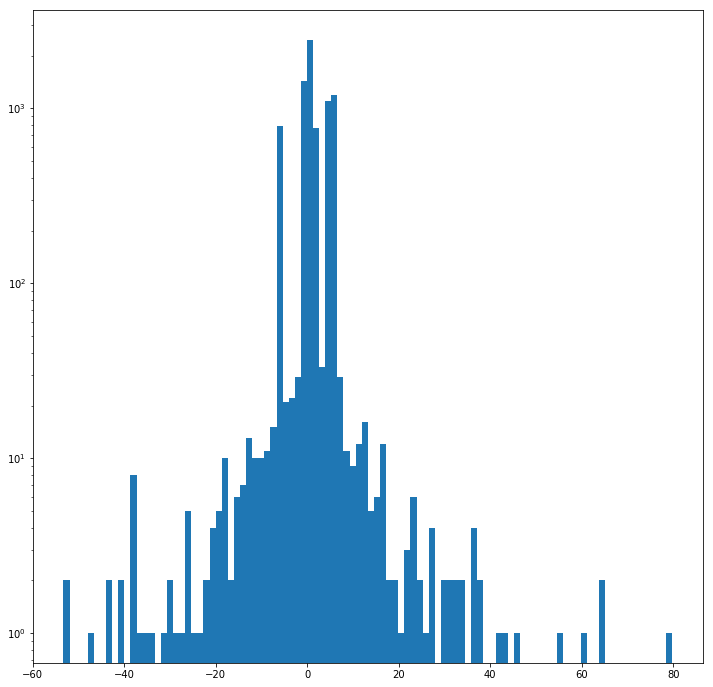

8100


In [87]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [112]:
ptrRanges = []
for i in range(25):
    ptrRanges.append([i*40.0,(i+1)*40])
print(ptrRanges)

[[0.0, 40], [40.0, 80], [80.0, 120], [120.0, 160], [160.0, 200], [200.0, 240], [240.0, 280], [280.0, 320], [320.0, 360], [360.0, 400], [400.0, 440], [440.0, 480], [480.0, 520], [520.0, 560], [560.0, 600], [600.0, 640], [640.0, 680], [680.0, 720], [720.0, 760], [760.0, 800], [800.0, 840], [840.0, 880], [880.0, 920], [920.0, 960], [960.0, 1000]]


In [ ]:
numMin = 9999999
for r in ptrRanges:
    
    numMin = min(numMin,(dfTracks[dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"])

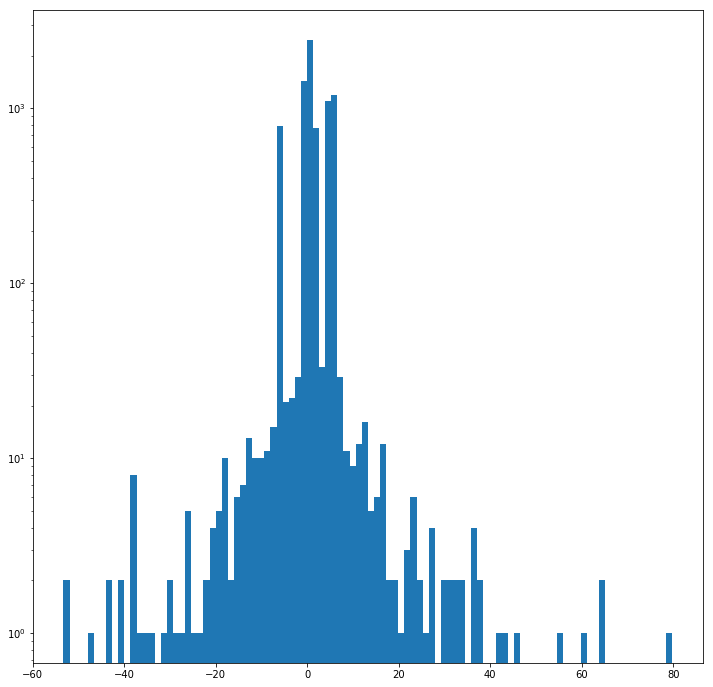

8100


In [88]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [75]:
dfTracks["PdgId"].value_counts()

-211     7607
 211     7551
 321     4129
-321     3971
 2212     600
-11       537
 11       496
-2212      82
-13        12
 13         6
 3222       3
 3112       2
-3312       2
-3222       1
-3112       1
Name: PdgId, dtype: int64

0
[   1.    0.  160.   -1.   -1.   -1.    5.]


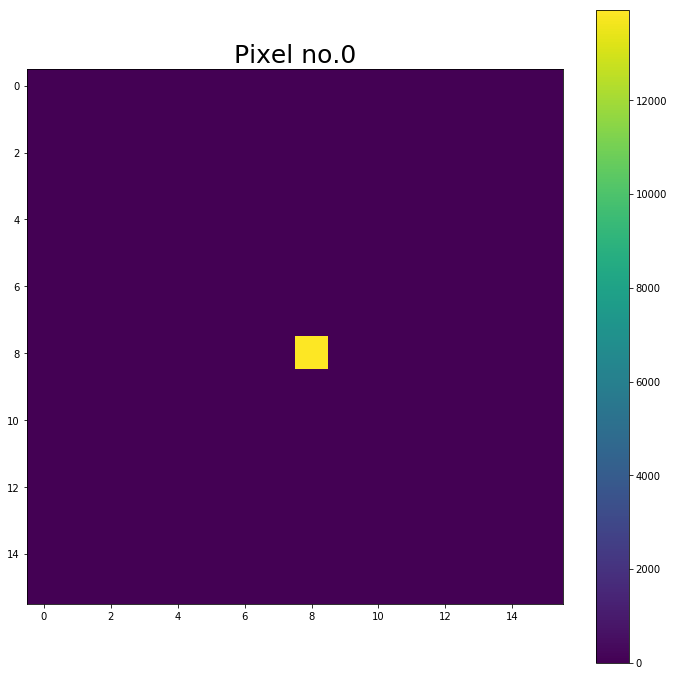

[   1.    0.  144.   -1.   -1.   -1.    5.]


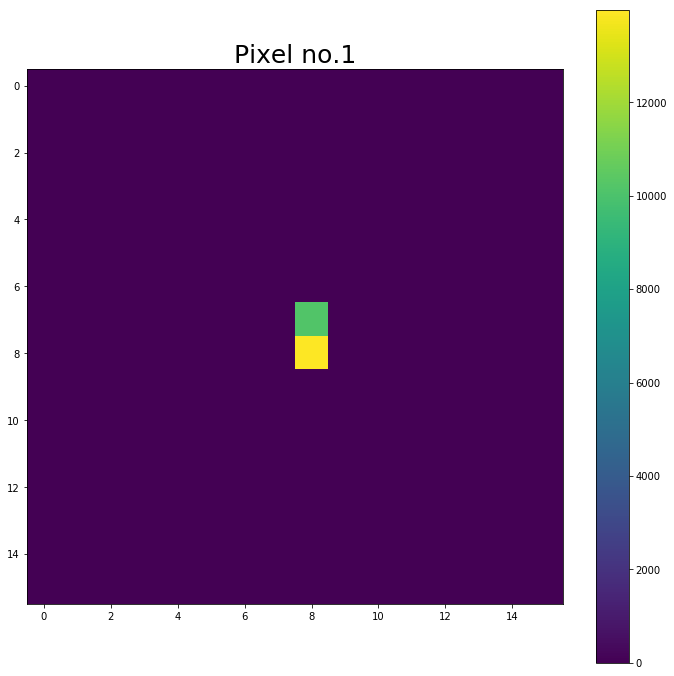

[  1.   1.  80.  -1.  -1.  -1.   5.]


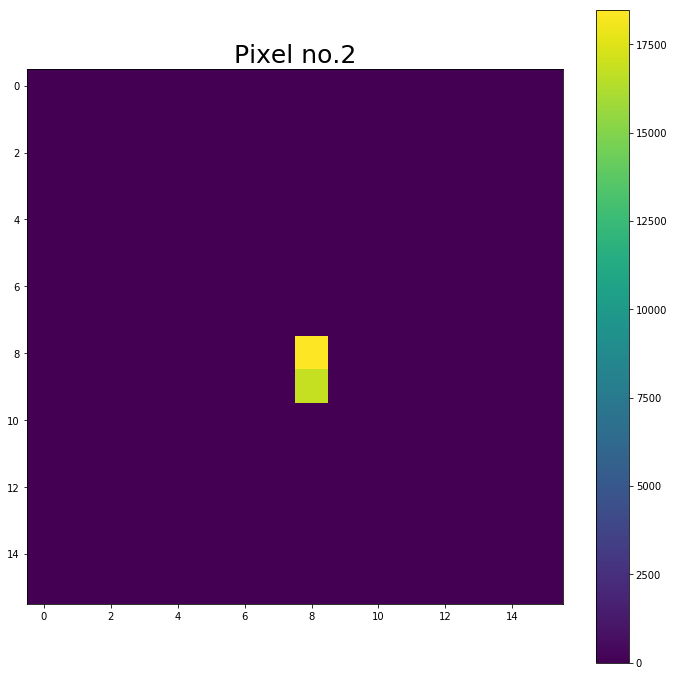

[  1.   2.  32.  -1.  -1.  -1.   4.]


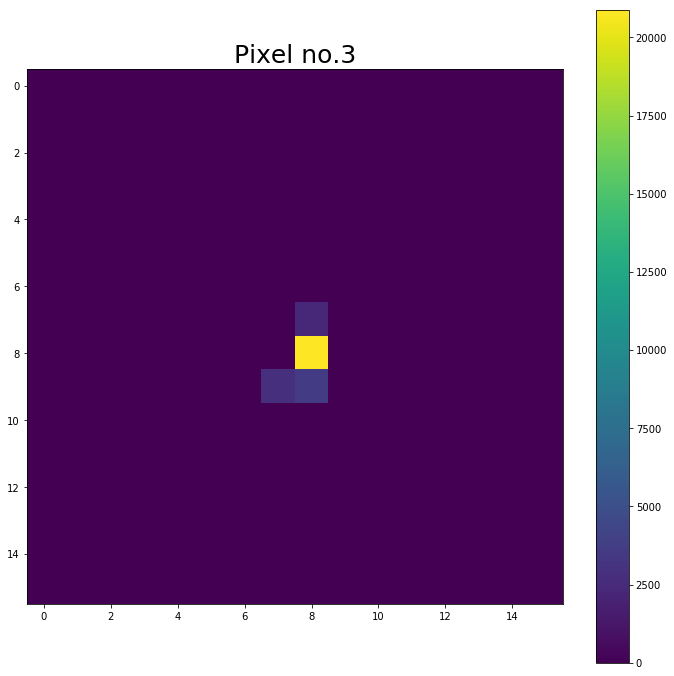

[  1.   2.  16.  -1.  -1.  -1.   4.]


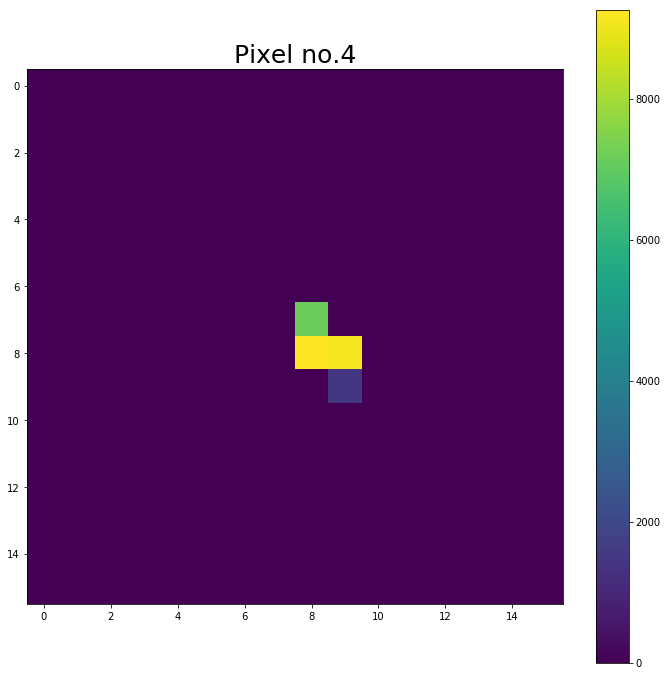

[  1.   3.  16.  -1.  -1.  -1.   4.]


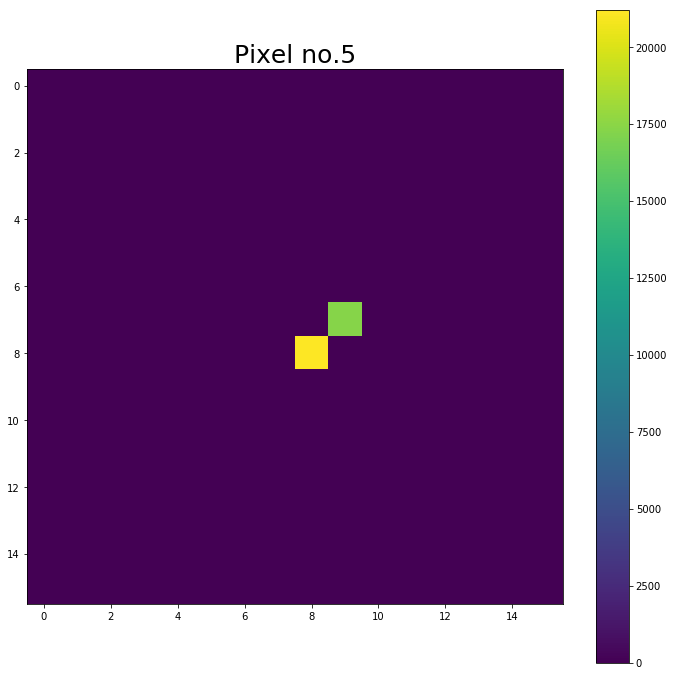

[ 1.  3.  0. -1. -1. -1.  4.]


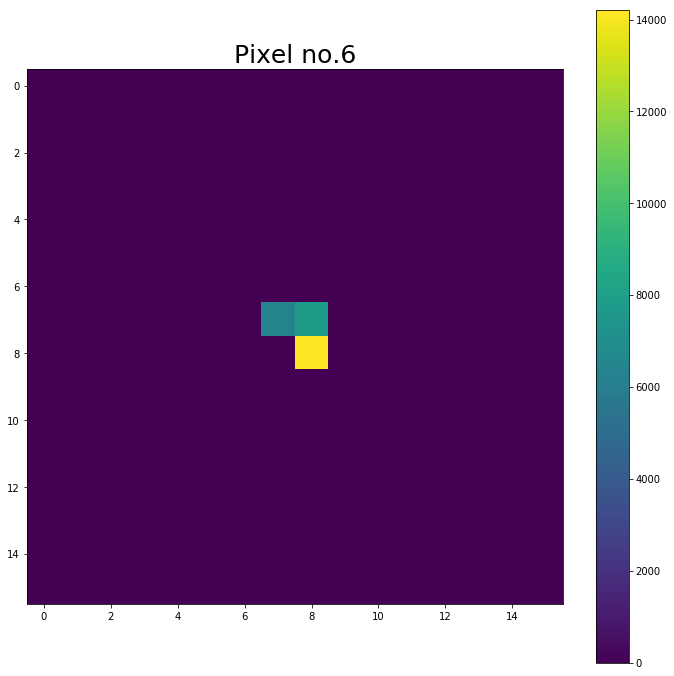

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


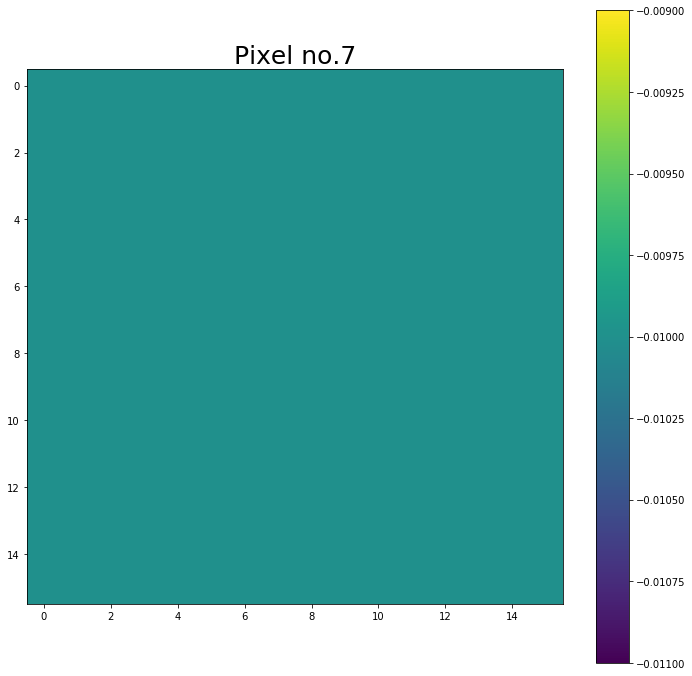

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


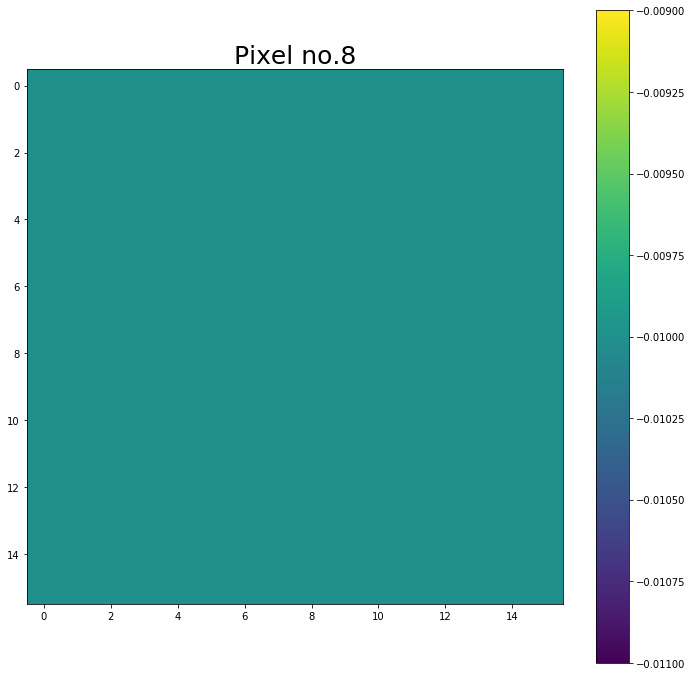

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


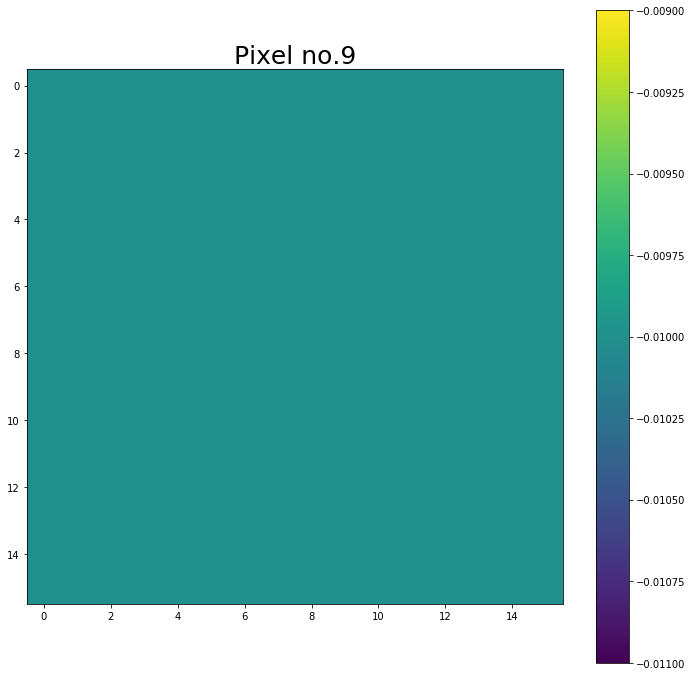

In [117]:
u = int(random.uniform(0,dfTracks[dfTracks["hit_6_IsBarrel"]>0.0].shape[0]))
print u

for i in range(10):
    plt.figure(figsize=(12,12))
    print(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitDets[i]].values[u])
    plt.imshow(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitPixels[i]].values[u].reshape(padshape,padshape))
    plt.colorbar()
    plt.title("Pixel no." + str(i),fontsize=25)
    plt.show()